### Compare the gene expression profiles for different clade: human,bioethanol, dairy and wild type

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import gseapy as gp

# set plot style as scientific
print(plt.style.available)
plt.style.use('ggplot')
# set work dir
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
#load strainlist
df_strain_info=pd.read_excel('data/1897_strains_info.xlsx',index_col=0)
wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','17. Taiwanese ', '24. Asian islands ', '18. Far East Asia ', '19. Malaysian ', '22. Far East Russian ']
wt_strainList=df_strain_info[(df_strain_info['nature_clade'].isin(wildtypelist)) & (df_strain_info['type']=='Wild')].index.tolist()
bioethanol_strainList=df_strain_info[(df_strain_info['nature_clade']=='3. Brazilian bioethanol ') & (df_strain_info['type']=='Industry')].index.tolist()
human_strainList=df_strain_info[(df_strain_info['nature_clade']=='10. French Guiana human ')&(df_strain_info['type']=='Human')].index.tolist()
dairy_strainList=df_strain_info[(df_strain_info['nature_clade']=='5. French dairy ')&(df_strain_info['type']=='Fermentation')].index.tolist()

### 1. gene level expression matrix

In [3]:
# load gene expression data
tpm_data=pd.read_csv('code/6.transcriptomics_ssGEMs_analysis/output/sce969_transcriptome_countMatrix_normalized.csv',index_col=0)
tpm_data

,APM_4.re,AMN_5.re,BHH_2.re,ATQ_7.re,MAB.re,AKV_3.re,BTV_5.re,CIC_4.re,BKA_2.re,AVC_3.re,...,BCV_8.re,CAP_4.re,XTRA_DHQ,CRB_2.re,ANP_2.re,ANS_2.re,CKK_4.re,CIT_3.re,YAZ.re,XTRA_DCP
re3,,,,,,,,,,,,,,,,,,,,,
YHR054W-A,40.934601,165.044436,33.483281,69.544959,170.431142,270.908863,0.000000,23.960411,250.687564,0.000000,...,272.382500,16.283373,331.111362,267.114763,108.215817,93.893370,25.796343,33.195343,182.261413,159.637022
YMR236W,333.989134,357.071613,216.700784,210.016566,376.963462,386.835214,305.783939,237.922680,260.989793,297.857521,...,345.538149,284.959033,416.208192,394.792260,281.581972,455.273666,375.039136,336.695625,204.353706,349.826585
YOR011W-A,0.930332,0.000000,0.000000,1.842251,9.235185,3.548947,6.291851,0.000000,1.526256,4.267300,...,3.013414,0.626284,3.226420,0.839984,0.000000,2.183567,1.984334,0.948438,0.789010,4.582881
YJL082W,829.856010,725.835747,343.862009,1072.189838,357.653530,997.254085,533.548930,617.926395,362.485824,466.842590,...,1378.134711,352.597660,857.421140,1275.934985,518.994223,1017.542102,424.647487,388.859736,236.703134,455.232849
YIL075C,4789.348363,4064.500297,3443.887118,6185.356325,3248.266449,4365.204712,3473.101528,3208.172957,2506.112515,4669.279356,...,4230.833383,4236.182194,6343.141905,4095.759702,4778.059578,3752.459448,4403.237262,3544.314227,2224.220449,4039.045811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YER011W,0.000000,1759.049891,4507.579472,0.000000,3306.851105,1277.354720,0.000000,358.018987,235.486054,0.000000,...,398.403477,6600.985185,82.354373,637.127509,643.685345,0.000000,633.101779,573.805220,1084.005672,3684.025294
619-snap_masked-348-ALB_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YKL018W,203.742675,216.761357,216.700784,174.092680,201.494946,205.838921,227.764992,188.320425,180.098220,168.131609,...,202.903215,202.915883,217.783356,162.956805,194.346773,153.941455,232.167084,176.409539,302.980011,203.174392


In [4]:
# extract human,diairy,bioethanol,wildtype strain expression data
df_geneTPM = tpm_data.loc[:, tpm_data.columns.isin(wt_strainList+bioethanol_strainList+dairy_strainList+human_strainList)].T
# add Type 
df_geneTPM['Type']=''
df_geneTPM.loc[df_geneTPM.index.isin(wt_strainList),'Type']='Wild'
df_geneTPM.loc[df_geneTPM.index.isin(bioethanol_strainList),'Type']='Bioethanol'
df_geneTPM.loc[df_geneTPM.index.isin(dairy_strainList),'Type']='Dairy'
df_geneTPM.loc[df_geneTPM.index.isin(human_strainList),'Type']='Human'
df_geneTPM

re3,YHR054W-A,YMR236W,YOR011W-A,YJL082W,YIL075C,YNL066W,YCL042W,YLR159C-A,YCR094W,YPL152W,...,YOR336W,scepan0192,YER186C,YOL096C,YER011W,619-snap_masked-348-ALB_3,YKL018W,YNL206C,YNL249C,Type
BGR_1.re,167.571593,262.461531,0.000000,912.558555,3225.248433,254.385792,24.227218,33.645549,241.262715,443.156201,...,489.591703,0.0,172.618930,169.590528,0.000000,0.0,171.609463,301.830761,114.069819,Dairy
BGS_1.re,2.502959,279.497142,4.171599,1020.373148,2618.929937,279.497142,17.520716,32.813799,275.325543,296.183539,...,412.988314,0.0,181.047402,123.479334,859.240960,0.0,213.585876,358.757526,124.313654,Dairy
YCR.re,5.287004,303.121545,0.000000,660.288017,3501.171336,380.664266,4.699559,331.401140,226.753714,348.942244,...,453.507428,0.0,105.740074,239.677501,3530.931292,0.0,184.457684,402.987171,122.188530,Wild
BCL_5.re,10.892177,387.277396,2.420484,545.819080,3340.267540,210.582084,8.471693,18.359369,312.242401,375.174977,...,540.978112,0.0,275.935145,199.689907,419.373010,0.0,180.326037,360.652075,104.080800,Human
BGK_1.re,151.791174,597.136449,0.911659,1106.753663,4041.383022,207.858184,19.144833,20.211473,242.501214,412.981392,...,480.444135,0.0,125.808901,237.942921,4450.015802,0.0,174.126812,340.048696,95.724164,Dairy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BGF_8.re,33.792910,261.895056,0.000000,815.857409,3234.464286,352.411780,26.551572,269.920872,223.274587,289.653518,...,506.893657,0.0,185.861007,241.377932,0.000000,0.0,164.136994,294.481077,90.516724,Dairy
BGN_1.re,588.312175,301.540759,1.230779,1180.316686,4678.189492,214.155478,11.077007,373.516692,407.387719,407.387719,...,524.311687,0.0,128.000975,189.539906,965.878129,0.0,178.462898,354.464239,93.539174,Dairy
APG_4.re,93.332281,396.186009,6.349135,791.102190,2693.302963,495.232511,10.158616,104.328982,316.186911,251.425736,...,606.977283,0.0,179.045600,261.584352,0.000000,0.0,253.965390,354.281719,107.935291,Bioethanol
BGB_7.re,108.884994,427.055430,0.000000,1142.585388,4112.176123,96.158176,33.938180,241.781249,231.910895,460.993609,...,610.887237,0.0,135.752719,359.179070,1472.549341,0.0,197.972716,195.144534,158.378173,Dairy


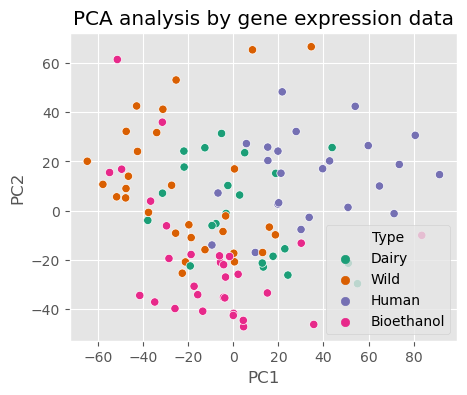

In [5]:
# PCA analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
x = StandardScaler().fit_transform(df_geneTPM.drop('Type',axis=1))

# PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(x)


# plot
fig,ax=plt.subplots(figsize=(5,4))
# plot geneMatrix
pca_geneTPM=pd.DataFrame(principalComponents1,columns=['PC1','PC2'])
pca_geneTPM['Type']=df_geneTPM['Type'].values
sns.scatterplot(data=pca_geneTPM,x='PC1',y='PC2',hue='Type',ax=ax,palette='Dark2')
ax.set_title('PCA analysis by gene expression data')

plt.show()

d:\softwares\programming\anoconda\envs\data\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


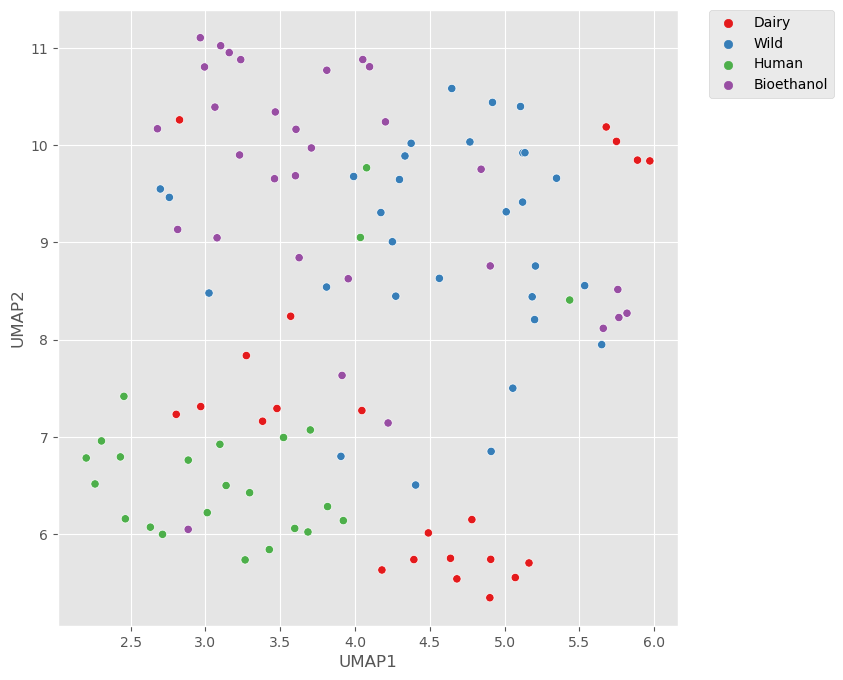

In [6]:
# try UMAP clustering
import umap
# umap clustering according to fluxome data
def umap_cluster(raw_data,emetric="euclidean",n_neighbors=15,min_dist=0.1,n_components=2):
    data = raw_data.iloc[:,:-1]
    data = pd.DataFrame(data, index=raw_data.index, columns=raw_data.columns[:-1])
    #UMAP降维
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, metric=emetric)
    embedding = reducer.fit_transform(data)
    embedding = pd.DataFrame(embedding, index=raw_data.index, columns=["UMAP1", "UMAP2"])
    embedding["label"]=raw_data.iloc[:,-1]
    # beautify the figure
    plt.figure(figsize=(8, 8))
    plt.style.use('ggplot')
    # set distinct color for each label
    sns.set_palette("Set1")
    sns.scatterplot(
        x="UMAP1", y="UMAP2",
        hue="label",
        data=embedding,
        legend="full",
        )
    # set legend outside
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    return embedding

embedding=umap_cluster(df_geneTPM,emetric="euclidean",n_neighbors=15,min_dist=0.1,n_components=2)

In [7]:
# split pan-genome into core and accessory
#load 1800 core gene list
df_core=pd.read_excel('result/pan1800_coregene.xlsx',index_col=0)
coreList=df_core[df_core['core99']==1].index.tolist()
acceList=df_core[df_core['core99']==0].index.tolist()

df_geneTPM_core=df_geneTPM.loc[:,df_geneTPM.columns.isin(coreList+['Type'])]
df_geneTPM_acce=df_geneTPM.loc[:,df_geneTPM.columns.isin(acceList+['Type'])]

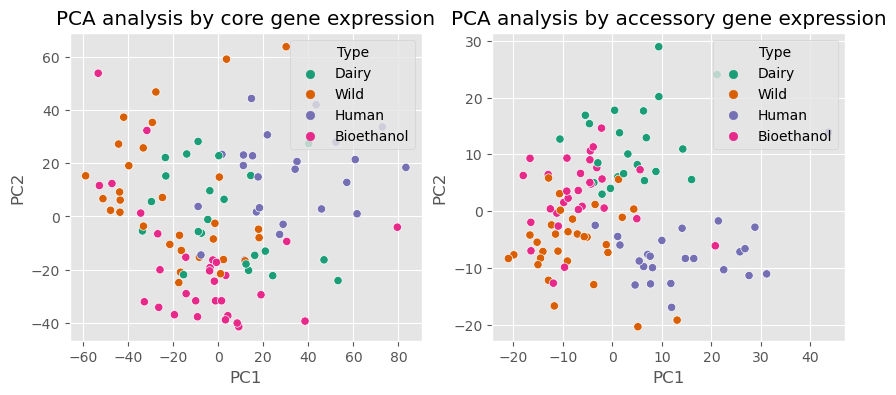

In [8]:
# PCA analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
x1 = StandardScaler().fit_transform(df_geneTPM_core.drop('Type',axis=1))
x2 = StandardScaler().fit_transform(df_geneTPM_acce.drop('Type',axis=1))

# PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(x1)
principalComponents2 = pca.fit_transform(x2)

# plot
fig,ax=plt.subplots(1,2,figsize=(10,4))

# plot core geneTPM
pca_geneTPM_core=pd.DataFrame(principalComponents1,columns=['PC1','PC2'])
pca_geneTPM_core['Type']=df_geneTPM_core['Type'].values
sns.scatterplot(data=pca_geneTPM_core,x='PC1',y='PC2',hue='Type',ax=ax[0],palette='Dark2')
ax[0].set_title('PCA analysis by core gene expression')

# plot accessory geneTPM
pca_geneTPM_acce=pd.DataFrame(principalComponents2,columns=['PC1','PC2'])
pca_geneTPM_acce['Type']=df_geneTPM_acce['Type'].values
sns.scatterplot(data=pca_geneTPM_acce,x='PC1',y='PC2',hue='Type',ax=ax[1],palette='Dark2')
ax[1].set_title('PCA analysis by accessory gene expression')

plt.show()



### 2. reaction level expression data

In [10]:
# load data
rxnTPM_data=pd.read_csv('code/6.transcriptomics_ssGEMs_analysis/output/sce969_rxn_expressionMatrix_normalized.csv',index_col=0)

In [11]:
# extract human,diairy,bioethanol,wildtype strain expression data
df_rxnTPM = rxnTPM_data.loc[:, rxnTPM_data.columns.isin(wt_strainList+bioethanol_strainList+dairy_strainList+human_strainList)].T
# add Type
df_rxnTPM['Type']=''
df_rxnTPM.loc[df_rxnTPM.index.isin(wt_strainList),'Type']='Wild'
df_rxnTPM.loc[df_rxnTPM.index.isin(bioethanol_strainList),'Type']='Bioethanol'
df_rxnTPM.loc[df_rxnTPM.index.isin(dairy_strainList),'Type']='Dairy'
df_rxnTPM.loc[df_rxnTPM.index.isin(human_strainList),'Type']='Human'
df_rxnTPM

,r_0001,r_0002,r_0003,r_0004,r_0005,r_0006,r_0007,r_0012,r_0013,r_0014,...,r_4669,r_4670,r_4671,r_4672,r_4678,r_4701,r_4702,r_4703,r_4704,Type
BGR_1.re,11259.599694,2699.315903,2111.805860,5629.799847,5265.382105,2425.750230,158.486386,2151.175089,338.171588,279.622478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Diary
BGS_1.re,8730.322668,2422.864777,1415.840746,4365.161334,3695.202513,2540.503873,271.988264,1166.379118,353.751607,324.550413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Diary
YCR.re,2709.295671,1012.754930,1674.217837,1030.378276,4634.352461,2518.963538,234.977942,675.561583,176.233456,340.718016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wild
BCL_5.re,2923.944340,1461.972170,1904.920691,946.409136,2782.346042,2478.575334,145.229023,1005.710988,204.530875,319.503852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Human
BGK_1.re,10344.591282,1684.745280,1869.811996,5604.877695,7564.032243,3411.426860,144.953733,751.206770,258.911071,280.790880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Diary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BGF_8.re,5035.143657,1549.646322,1344.475080,2517.571828,4066.011261,2952.655550,217.240139,1115.166045,253.446828,236.550373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Diary
BGN_1.re,5417.887435,1533.550146,2007.399911,2708.943718,9414.225578,2837.560082,132.924090,896.006827,182.155234,269.540515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Diary
APG_4.re,2057.119661,1028.559830,4225.984093,986.655541,3631.705080,2401.242764,132.062003,618.405725,218.410236,355.551546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bioethanol
BGB_7.re,7621.949553,1295.307197,3122.312544,7729.420456,4267.726113,1948.617159,127.268174,1162.382659,367.663615,325.240890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Diary


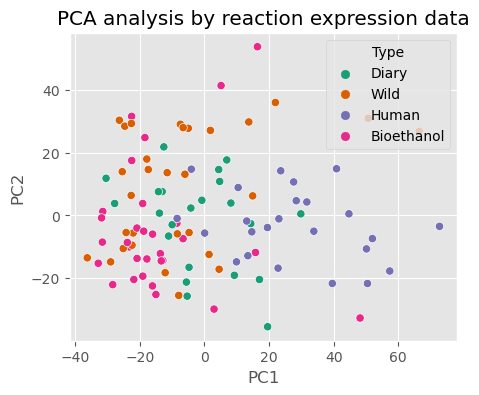

In [12]:
# PCA analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
x = StandardScaler().fit_transform(df_rxnTPM.drop('Type',axis=1))

# PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(x)

# plot
fig,ax=plt.subplots(figsize=(5,4))
# plot geneMatrix
pca_rxnTPM=pd.DataFrame(principalComponents1,columns=['PC1','PC2'])
pca_rxnTPM['Type']=df_rxnTPM['Type'].values
sns.scatterplot(data=pca_rxnTPM,x='PC1',y='PC2',hue='Type',ax=ax,palette='Dark2')
ax.set_title('PCA analysis by reaction expression data')

plt.show()

### 3.Find growth related genes/reactions

In [13]:
# check the glucose transport reaction
gluc_transprters_geneList=['YDL245C','YDL247W','YDR342C','YDR343C','YDR345C','YDR536W','YEL069C','YFL011W','YHR092C','YHR094C','YHR096C','YJL214W','YJL219W','YJR158W','YJR160C','YLR081W','YMR011W','YNR072W','YOL156W','YDR387C']
gluc_rxn='r_1166'

df_rxnTPM[gluc_rxn].describe()

count      106.000000
mean     21358.632051
std      13312.135353
min       4492.820460
25%      12605.412388
50%      18507.753863
75%      26109.557774
max      85078.265791
Name: r_1166, dtype: float64

c:\Users\miniY\.conda\envs\data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


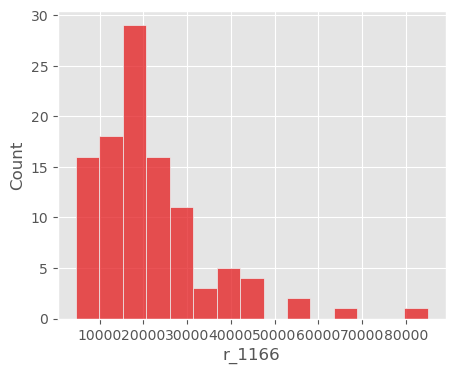

In [14]:
# plot the distribution of glucose transport reaction
fig,ax=plt.subplots(figsize=(5,4))
sns.histplot(df_rxnTPM[gluc_rxn],ax=ax)
plt.show()

In [15]:
df_geneTPM.loc[:,df_geneTPM.columns.isin(gluc_transprters_geneList)].describe()

re3,YJR160C,YNR072W,YDL247W,YOL156W,YEL069C,YDR343C,YHR094C,YLR081W,YHR092C,YJR158W,YJL214W,YDR536W,YHR096C,YJL219W,YDL245C,YMR011W,YDR387C,YDR342C,YDR345C
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,20.547306,547.338002,13.289559,33.519608,448.926672,4626.128237,367.754514,41.253859,4645.513035,62.303622,36.248421,136.516088,1306.283797,28.730626,53.234554,2612.785406,295.446270,2106.559601,3976.252874
std,14.925098,3110.774297,12.910429,60.225604,2543.778502,5901.212473,622.578136,117.861024,4069.486605,207.484221,43.693053,133.077127,1347.940819,59.758344,157.191313,2298.338928,75.310637,3305.536839,2301.379134
min,0.000000,10.379427,0.000000,0.000000,8.202774,75.375450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332446,0.630983,122.256014,156.399235,0.000000,399.172225
25%,9.867289,46.278943,1.971267,13.226083,37.116677,519.010581,37.356361,4.174546,1636.517000,8.476006,5.292540,56.642402,391.156391,8.587880,10.614459,1278.596844,246.756243,0.000000,2493.351027
50%,16.856907,78.747001,10.360578,20.701531,62.940113,3035.995578,123.001369,15.972645,3915.959530,17.751380,17.515748,93.291899,932.861612,18.449544,28.274524,2106.625041,285.575847,269.032253,3758.087979
75%,28.385035,221.819727,20.383101,32.145147,168.837076,6214.546961,303.357773,25.544054,6076.794541,50.574054,68.443537,172.116105,1631.345603,25.534004,49.095976,3282.823759,323.162190,3463.369299,4920.482048
max,67.011376,31728.808519,57.873461,571.834751,25862.879667,39216.338130,3440.533540,1029.422481,24671.573654,2027.153223,272.535703,845.604512,6628.004541,568.559357,1600.969152,17642.122935,580.882135,13354.059908,17593.849757


In [23]:
# load growth data
df_exp_data=pd.read_csv('data/transcriptomics/combined_969growth_data.csv',index_col=0)
# remove rows with genome_id is NaN
df_exp_data=df_exp_data[df_exp_data['genome_id'].notnull()]
#set genome_id as index
df_exp_data=df_exp_data.set_index('genome_id')
df_liquid_grwoth=df_exp_data['t_mid_norm']
df_liquid_grwoth=1/df_liquid_grwoth

In [25]:
df_grwoth=pd.DataFrame(index=df_geneTPM.index)
df_grwoth['growth']=df_grwoth.index.map(df_liquid_grwoth)
df_grwoth['glucose_transport']=df_grwoth.index.map(df_rxnTPM[gluc_rxn])
df_grwoth

,growth,glucose_transport
BGR_1.re,0.140188,8961.526904
BGS_1.re,0.196120,10046.478882
YCR.re,0.052031,18438.683861
BCL_5.re,0.117764,19556.891273
BGK_1.re,0.110274,10382.716849
...,...,...
BGF_8.re,0.235771,11421.170978
BGN_1.re,0.148353,8498.932450
APG_4.re,0.085663,21702.485437
BGB_7.re,NaN,9620.512400


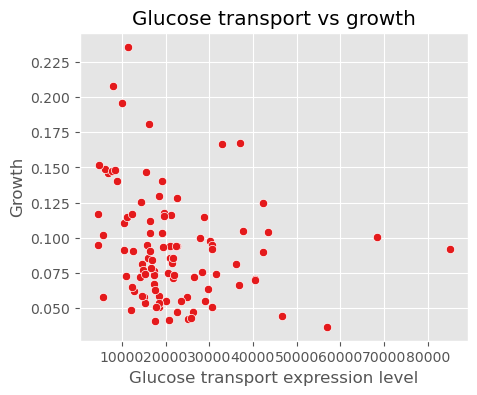

,growth,glucose_transport
growth,1.000000,-0.210124
glucose_transport,-0.210124,1.000000


In [27]:
# plot the scatter plot of glucose transport and growth, and calculate the correlation
fig,ax=plt.subplots(figsize=(5,4))
sns.scatterplot(data=df_grwoth,x='glucose_transport',y='growth',ax=ax)
ax.set_title('Glucose transport vs growth')
ax.set_xlabel('Glucose transport expression level')
ax.set_ylabel('Growth')
plt.show()
df_grwoth.corr()


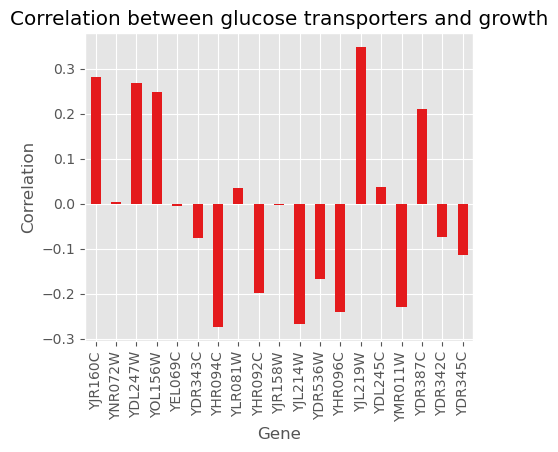

count    19.000000
mean     -0.011231
std       0.200808
min      -0.274176
25%      -0.182591
50%      -0.004051
75%       0.123508
max       0.347723
dtype: float64


In [19]:
# calculate the correlation between glucose transport and growth
df_gluc_corr_genes=df_geneTPM.loc[:,df_geneTPM.columns.isin(gluc_transprters_geneList)].corrwith(df_grwoth['growth'])
# plot barplot
fig,ax=plt.subplots(figsize=(5,4))
df_gluc_corr_genes.plot.bar(ax=ax)
ax.set_title('Correlation between glucose transporters and growth')
ax.set_xlabel('Gene')
ax.set_ylabel('Correlation')
plt.show()
print(df_gluc_corr_genes.describe())

In [20]:
# calculate the sum of glucose transporters in each strain, and calculate the correlation between glucose transport and growth
df_geneTPM.loc[:,df_geneTPM.columns.isin(gluc_transprters_geneList)].sum(axis=1).corr(df_grwoth['growth'])

# calculate the max of glucose transporters in each strain, and calculate the correlation between glucose transport and growth
# df_geneTPM.loc[:,df_geneTPM.columns.isin(gluc_transprters_geneList)].max(axis=1).corr(df_grwoth['growth'])

-0.21012369336102243

c:\Users\miniY\.conda\envs\data\Lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\miniY\.conda\envs\data\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\miniY\.conda\envs\data\Lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\miniY\.conda\envs\data\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\miniY\.conda\envs\data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


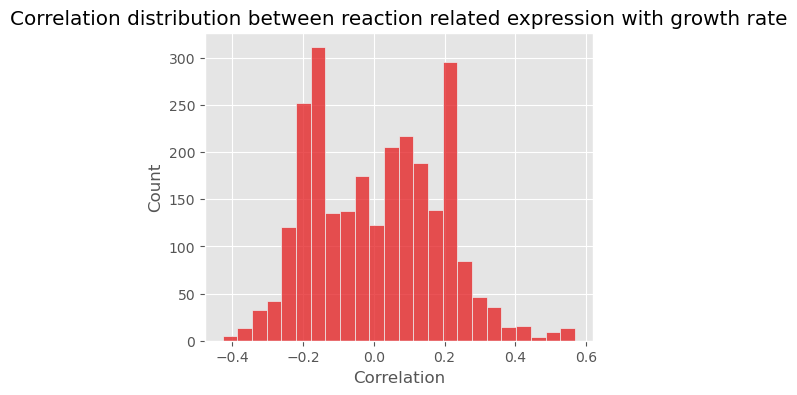

count    2615.000000
mean        0.011595
std         0.180320
min        -0.427944
25%        -0.137225
50%         0.023008
75%         0.155286
max         0.568923
dtype: float64


r_0472    0.544477
r_0958    0.507880
r_2209    0.568923
r_2210    0.568923
r_2211    0.568923
r_2212    0.568923
r_2512    0.566786
r_2513    0.566786
r_2514    0.566786
r_2515    0.566786
r_2516    0.566786
r_2517    0.566786
r_2518    0.566786
r_2519    0.566786
dtype: float64

In [30]:
# find the rxns which is correlated with growth
# calculate the correlation of each columns with growth
df_rxnTPM.drop('Type',axis=1).corrwith(df_grwoth['growth']).describe()

df_rxncorr=df_rxnTPM.drop('Type',axis=1).corrwith(df_grwoth['growth'])

# plot the distribution of correlation
fig,ax=plt.subplots(figsize=(5,4))
sns.histplot(df_rxncorr,ax=ax)
ax.set_title('Correlation distribution between reaction related expression with growth rate')
ax.set_xlabel('Correlation')
plt.show()

print(df_rxncorr.describe())
df_rxncorr[df_rxncorr>0.5]

In [23]:
df_rxncorr[df_rxncorr<-0.4]

r_0472   -0.427441
r_0671   -0.478405
r_0958   -0.411711
r_1076   -0.420442
r_2209   -0.484356
r_2210   -0.484356
r_2211   -0.484356
r_2212   -0.484356
r_2512   -0.419677
r_2513   -0.419677
r_2514   -0.419677
r_2515   -0.419677
r_2516   -0.419677
r_2517   -0.419677
r_2518   -0.419677
r_2519   -0.419677
r_1183   -0.407752
r_4254   -0.453649
r_4255   -0.453649
dtype: float64

c:\Users\miniY\.conda\envs\data\Lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\miniY\.conda\envs\data\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\miniY\.conda\envs\data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


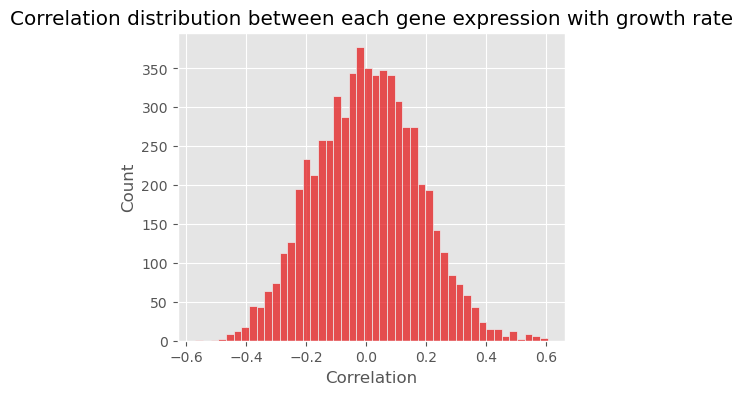

count    6232.000000
mean        0.001421
std         0.172228
min        -0.570128
25%        -0.119914
50%         0.001754
75%         0.119428
max         0.605501
dtype: float64


re3
YIL009W                      0.568923
YDR194C                      0.518397
YKL127W                      0.587615
YBR076W                      0.542488
YNR068C                      0.535002
YIR035C                      0.539720
YLR010C                      0.519476
YDR046C                      0.564906
YHR048W                      0.532991
YDL171C                      0.544477
YNR069C                      0.554642
YOR311C                      0.566786
684-snap_masked-859-BGT_2    0.540248
YEL071W                      0.566918
scepan1029                   0.532934
YER060W                      0.599964
YML051W                      0.541292
YMR320W                      0.558216
YDL248W                      0.605501
dtype: float64

In [32]:
# find the genes which is correlated with growth
df_genecorr=df_geneTPM.drop('Type',axis=1).corrwith(df_grwoth['growth'])

# plot the distribution of correlation
fig,ax=plt.subplots(figsize=(5,4))
sns.histplot(df_genecorr,ax=ax)
ax.set_title('Correlation distribution between each gene expression with growth rate')
ax.set_xlabel('Correlation')
plt.show()

print(df_genecorr.describe())
# find those rxns correlation <0.45
df_genecorr[df_genecorr>0.5]

In [33]:
df_grwoth
df_grwoth['99%']=''
df_grwoth['1%']=''
df_grwoth['sum']=''
# for each strain, sort by value, and find value ranked 1% and 99%
for strain in df_grwoth.index:
    strain_data=df_geneTPM.loc[strain,:].drop('Type')
    # sort by value
    strain_data=strain_data.sort_values(ascending=False) # 从大到小排序
    # find 1% and 99%
    df_grwoth.loc[strain,'99%']=strain_data.iloc[int(len(strain_data)*0.01)]
    df_grwoth.loc[strain,'1%']=strain_data.iloc[int(len(strain_data)*0.9)]
    df_grwoth.loc[strain,'sum']=strain_data.sum()

print(df_grwoth)
# print correlation of each column with growth
df_grwoth.corr()

            growth  glucose_transport          99%        1%             sum
BGR_1.re  0.140188        8961.526904  7760.785588  6.056805  4332239.984513
BGS_1.re  0.196120       10046.478882  7989.930568  4.171599  4527491.105093
YCR.re    0.052031       18438.683861  6616.978846  4.699559  4421369.958086
BCL_5.re  0.117764       19556.891273  6618.812746  6.051209  4412334.975828
BGK_1.re  0.110274       10382.716849  7642.434892  4.558294  4578552.540273
...            ...                ...          ...       ...             ...
BGF_8.re  0.235771       11421.170978  6630.651786  6.034448  4325834.159558
BGN_1.re  0.148353        8498.932450  7794.520929  7.384672  4585685.955915
APG_4.re  0.085663       21702.485437  8112.289476  5.079308  4911312.898277
BGB_7.re       NaN        9620.512400  6456.738712  4.751345  4308452.466622
CDI_1.re  0.090446       16329.046620  6992.147756    5.7345  4262474.910788

[106 rows x 5 columns]


,growth,glucose_transport,99%,1%,sum
growth,1.000000,-0.210124,-0.011777,-0.120817,-0.079417
glucose_transport,-0.210124,1.000000,0.377399,0.226214,0.414518
99%,-0.011777,0.377399,1.000000,0.286603,0.937236
1%,-0.120817,0.226214,0.286603,1.000000,0.233807
sum,-0.079417,0.414518,0.937236,0.233807,1.000000


In [34]:
# compare the GIMME and PNAS original method
# load data
gimme_flux=pd.read_excel(r'code\6.transcriptomics_ssGEMs_analysis\output\GIMME_ssGEMs_flux.xlsx',index_col=0)
pnas_flux=pd.read_excel(r'code\6.transcriptomics_ssGEMs_analysis\output\PNAS_ssGEMs_flux.xlsx',index_col=0)
this_study=pd.read_csv(r'code\6.transcriptomics_ssGEMs_analysis\output\PNAS_v3_tissGEMs_sample_flux.csv',index_col=0)
new_method=pd.read_csv(r'code\6.transcriptomics_ssGEMs_analysis\output\new2_0.1_tissGEMs_fba_fluxes.csv',index_col=0)


gimme_growth=gimme_flux.loc['growth',:]
pnas_growth=pnas_flux.loc['growth',:]
this_growth=this_study.loc['growth',:]
new_growth=new_method.loc['growth',:]
# remove 0 value
this_growth=this_growth[this_growth!=0]
new_growth=new_growth[new_growth!=0]
# randomly sample 100 in this_growth
# this_growth=this_growth.sample(100)
# remove this_growth which is <0.08
this_growth=this_growth[this_growth>0.08]

# remove .xml in the index
gimme_growth.index=gimme_growth.index.str.replace('.xml','')
pnas_growth.index=pnas_growth.index.str.replace('.xml','')

df_gimme_growth=pd.DataFrame(index=gimme_growth.index)
df_gimme_growth['predict']=df_gimme_growth.index.map(gimme_growth)
df_gimme_growth['exp']=df_gimme_growth.index.map(df_liquid_grwoth)

df_pnas_growth=pd.DataFrame(index=pnas_growth.index)
df_pnas_growth['predict']=df_pnas_growth.index.map(pnas_growth)
df_pnas_growth['exp']=df_pnas_growth.index.map(df_liquid_grwoth)

df_this_growth=pd.DataFrame(index=this_growth.index)
df_this_growth['predict']=df_this_growth.index.map(this_growth)
df_this_growth['exp']=df_this_growth.index.map(df_liquid_grwoth)

df_new_growth=pd.DataFrame(index=new_growth.index)
df_new_growth['predict']=df_new_growth.index.map(new_growth)
df_new_growth['exp']=df_new_growth.index.map(df_liquid_grwoth)


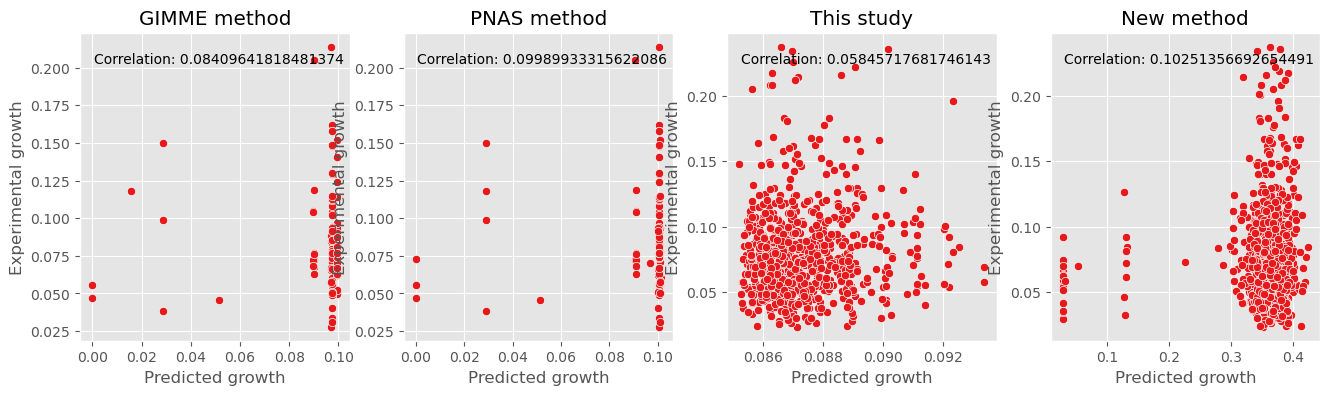

          predict       exp
predict  1.000000  0.084096
exp      0.084096  1.000000
          predict       exp
predict  1.000000  0.099899
exp      0.099899  1.000000


In [35]:
# plot the scatter plot of predicted growth and experimental growth, and calculate the correlation
fig,axes=plt.subplots(1,4,figsize=(16,4))
sns.scatterplot(data=df_gimme_growth,x='predict',y='exp',ax=axes[0])
axes[0].set_title('GIMME method')
axes[0].set_xlabel('Predicted growth')
axes[0].set_ylabel('Experimental growth')
# calculate the correlation
axes[0].text(0.05,0.9,'Correlation: '+str(df_gimme_growth.corr().iloc[0,1]),transform=axes[0].transAxes)
sns.scatterplot(data=df_pnas_growth,x='predict',y='exp',ax=axes[1])
axes[1].set_title('PNAS method')
axes[1].set_xlabel('Predicted growth')
axes[1].set_ylabel('Experimental growth')
# calculate the correlation
axes[1].text(0.05,0.9,'Correlation: '+str(df_pnas_growth.corr().iloc[0,1]),transform=axes[1].transAxes)

sns.scatterplot(data=df_this_growth,x='predict',y='exp',ax=axes[2])
axes[2].set_title('This study')
axes[2].set_xlabel('Predicted growth')
axes[2].set_ylabel('Experimental growth')
# calculate the correlation
axes[2].text(0.05,0.9,'Correlation: '+str(df_this_growth.corr().iloc[0,1]),transform=axes[2].transAxes)

sns.scatterplot(data=df_new_growth,x='predict',y='exp',ax=axes[3])
axes[3].set_title('New method')
axes[3].set_xlabel('Predicted growth')
axes[3].set_ylabel('Experimental growth')
# calculate the correlation
axes[3].text(0.05,0.9,'Correlation: '+str(df_new_growth.corr().iloc[0,1]),transform=axes[3].transAxes)

plt.show()

print(df_gimme_growth.corr())
print(df_pnas_growth.corr())

In [93]:
# find the min value's index
df_liquid_grwoth.idxmin()
df_liquid_grwoth['BTD_1.re']

3.11242164639025

In [81]:
# calculate the foldchange of each columns to BTD_1.re column
df_tpmFC=tpm_data.copy()
# each column divide by BTD_1.re column
df_tpmFC=df_tpmFC.div(df_tpmFC['BTD_1.re'],axis=0)
df_tpmFC

,CNF_4.re,ACS_2.re,CBA_3.re,YBK.re,CIT_3.re,ATP_4.re,BFM_3.re,AKT_4.re,BHP_4.re,YBH.re,...,ACB_6.re,BFH_3.re,CIB_4.re,XTRA_DCU,BCC_3.re,ACV_2.re,AQQ_4.re,CCL_1.re,AGV_2.re,AAQ_3.re
gene,,,,,,,,,,,,,,,,,,,,,
YNL201C,1.547249,1.655877,1.217833,1.306765,1.013977,1.122150,0.792963,0.742845,1.486795,0.786205,...,0.499890,1.149366,0.619291,0.681929,0.844154,1.048273,1.253328,1.175254,0.955666,1.266081
YGR040W,0.966112,1.899234,1.175929,1.415521,1.009843,1.229078,0.715159,0.603373,3.162785,0.716846,...,1.256773,0.455464,0.764325,0.768731,0.781540,0.806591,0.561926,0.880717,0.659386,1.614018
YKR007W,0.781370,0.992445,1.069236,0.940107,0.739757,1.201760,0.835343,0.735250,1.217546,0.656664,...,0.934996,0.972237,1.064369,0.711341,0.838455,0.962585,1.075112,0.906678,0.890305,1.028157
YDR366C,0.871214,2.105651,1.171547,7.376591,1.667063,0.817364,1.142436,0.414108,0.755285,1.137666,...,47.159068,5.087904,2.500005,0.210994,1.039591,0.901682,0.816272,4.829456,0.948027,3.074229
YMR069W,1.106902,1.411081,1.400277,2.430172,0.673885,1.562373,0.721488,0.524073,1.010909,0.921357,...,1.273529,1.306237,1.362574,0.420314,1.720467,1.047548,1.317113,1.154043,0.501133,0.787379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR178W,1.002030,1.216764,1.112498,1.183605,1.038479,0.926913,0.733463,1.604656,1.071187,1.041368,...,1.116320,1.119244,0.926931,1.165890,0.820970,1.279048,1.043356,1.094984,1.306378,1.305994
YNL215W,1.016310,1.410364,1.253955,0.826442,1.022698,1.178604,1.212647,1.163186,1.054742,1.000824,...,0.882670,1.453321,0.995839,1.164918,1.039740,1.488206,1.967071,1.245678,1.217795,1.372607
YDR456W,1.159264,1.130786,1.060878,1.437798,1.040049,0.979157,0.836180,0.751661,1.163392,1.034197,...,0.567414,1.701233,0.689630,0.650584,0.996035,0.959068,0.926682,1.104212,0.897244,1.153647


In [85]:
# calculate the >1 ratios in each columns
(df_tpmFC[df_tpmFC<1].count()/len(df_tpmFC)).describe()

count    969.000000
mean       0.465373
std        0.086375
min        0.000000
25%        0.407034
50%        0.459250
75%        0.518593
max        0.736752
dtype: float64